# Прогнозирование оттока посетителей

[Описание проекта](#0)

[1 Загрузим библиотеки и данные](#1) 
- [1.1 Изучение данных](#1.1)
- [1.2 Подготовка данных](#1.2)

[2 Исследовательский анализ данных (EDA)](#2)
- [2.1 Построим графики распределения признаков](#2.1)
- [2.2 Построим матрицу корреляций](#2.2)

[3 Модель прогнозирования оттока клиентов](#3)


[4 Кластеризация клиентов](#4)
- [4.1 Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов](#4.1)
- [4.2 Отобразим среднии значения признаков кластеров](#4.2)
- [4.3 Построим распределения признаков для кластеров](#4.3)


[5 Итоговый вывод](#5)

[6 Базовые рекомендации](#6)

**Описание проекта**
<a name="0"></a>

**Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; 
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать основные свойства; 
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * 1) выделить целевые группы клиентов;
    * 2) предложить меры по снижению оттока;
    * 3) определить другие особенности взаимодействия с клиентами.

**Инструкция по выполнению проекта**
**Шаг 1. Загрузите данные**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* `'Churn'` — факт оттока в текущем месяце;
* Текущие поля в датасете:
    * Данные клиента за предыдущий до проверки факта оттока месяц:
    * `'gender'` — пол;
    * `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
    * `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * `'Phone'` — наличие контактного телефона;
    * `'Age'` — возраст;
    * `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    * `'Group_visits'` — факт посещения групповых занятий;
    * `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    * `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
Путь к файлу: `/datasets/gym_churn.csv`

**Шаг 2. Проведите исследовательский анализ данных (EDA)**
* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

**Шаг 3. Постройте модель прогнозирования оттока клиентов**

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией `train_test_split()`.
* Обучите модель на train-выборке двумя способами:
    * логистической регрессией,
    * случайным лесом.
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
Не забудьте указать параметр `random_state` при разделении выборки и задании алгоритма.

**Шаг 4. Сделайте кластеризацию клиентов**

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять `n=5`, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом `groupby()`). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами**

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.


## Загрузим библиотеки и данные
<a name="1"></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters() # add pd.Timestamp, pd.Period, np.datetime64, datetime.datetime, datetime.date, datetime.time
## https://runebook.dev/ru/docs/pandas/reference/api/pandas.plotting.register_matplotlib_converters

#import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns; sns.set()

import plotly.express as px
#import plotly.graph_objs as go
import plotly.graph_objects as go
#from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

#import requests
##import StringIO
#import re
#from collections import defaultdict

In [2]:
#data = pd.read_csv('/datasets/gym_churn.csv')

try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    url = 'https://code.s3.yandex.net/datasets/gym_churn.csv'
    data = pd.read_csv(url)

### Изучение данных
<a name="1.1"></a>

In [3]:
list_df = (data,)
for list_df in list_df:
    display('______________info_____________________')
    display(list_df.info())
    display('______________describe_________________')
    display(list_df.describe().T)
    display('______________head_____________________')
    display(list_df.head(10))
    display('______________sample___________________')
    display(list_df.sample(10))
    display('______________tail_____________________')
    display(list_df.tail(10))
    display('_____________isna______________________')
    display(list_df.isna().sum().reset_index())
    display('_____________duplicated________________')
    display(list_df.duplicated().sum())
    display('__количество пропущенных значений по каждому из столбцов__')
    display(list_df.isnull().mean().reset_index())

'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

'______________describe_________________'

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


'______________head_____________________'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


'______________sample___________________'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3783,1,1,1,1,1,12,1,35,43.534764,12.0,6,2.733511,2.594231,0
29,0,1,1,1,1,6,1,27,159.148924,5.0,3,3.511568,3.528886,0
1917,1,1,0,0,1,1,0,33,115.325010,1.0,0,2.855526,2.233339,1
690,0,1,0,0,0,6,0,28,103.758303,6.0,5,0.506350,0.436155,0
3529,0,1,1,1,1,12,1,28,91.170665,5.0,7,1.558507,1.610447,0
2351,0,1,0,0,1,1,0,33,7.142135,1.0,8,0.653272,0.756081,0
3891,0,1,1,1,1,12,0,26,165.876981,11.0,10,3.275314,3.122095,0
216,0,1,1,1,1,12,0,30,109.079644,12.0,2,3.217038,3.272678,0
3278,1,0,0,0,1,1,0,25,71.901004,1.0,0,1.170861,1.057753,1
917,1,0,0,0,1,1,0,25,168.609715,1.0,1,1.625422,0.852373,1


'______________tail_____________________'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3990,1,0,1,0,1,12,0,33,31.771147,8.0,10,1.831577,1.924509,0
3991,1,0,1,0,1,6,0,33,69.301270,6.0,1,1.367289,1.435721,0
3992,0,1,1,1,1,12,0,31,223.102448,8.0,4,3.855916,3.797062,0
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


'_____________isna______________________'

,index,0
0,gender,0
1,Near_Location,0
2,Partner,0
3,Promo_friends,0
4,Phone,0
5,Contract_period,0
6,Group_visits,0
7,Age,0
8,Avg_additional_charges_total,0
9,Month_to_end_contract,0


'_____________duplicated________________'

0

'__количество пропущенных значений по каждому из столбцов__'

,index,0
0,gender,0.0
1,Near_Location,0.0
2,Partner,0.0
3,Promo_friends,0.0
4,Phone,0.0
5,Contract_period,0.0
6,Group_visits,0.0
7,Age,0.0
8,Avg_additional_charges_total,0.0
9,Month_to_end_contract,0.0


<a name="1.2"></a>
**Вывод:** 
* данные содержатся в таблице 4000 строк и 14 столбцов
* дублей нет, пропусков нет, аномалии не выявлены
* типы данных соответствуют представленным в таблице

<a name="1.2"></a>
### Подготовка данных

Переведем названия столбцов в нижний регистр:

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Переведем колонку срока до окончания текущего действующего абонемента (в месяцах) в целочисленный тип:

In [5]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype(np.int64)

In [6]:
data['month_to_end_contract'].head()

0     5
1    12
2     1
3    12
4     1
Name: month_to_end_contract, dtype: int64

## Исследовательский анализ данных (EDA)
<a name="2"></a>

### Построим графики распределения признаков
<a name="2.1"></a>

C:\Users\skd23\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



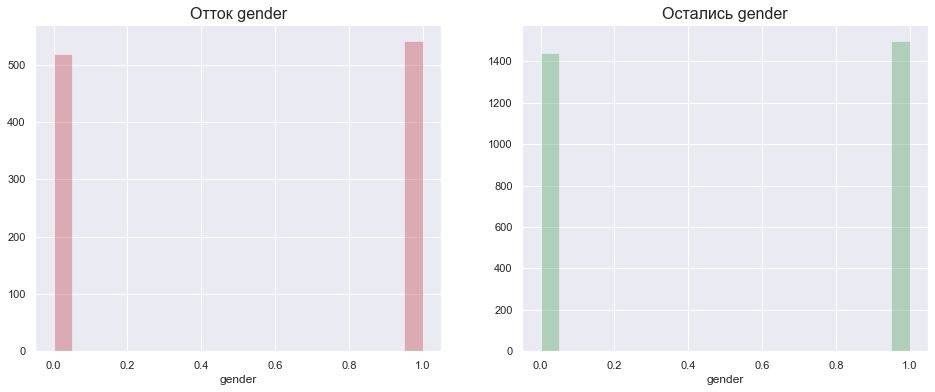

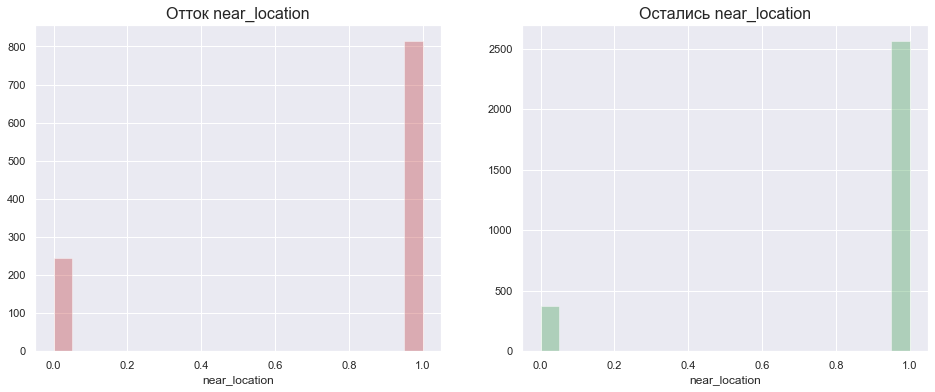

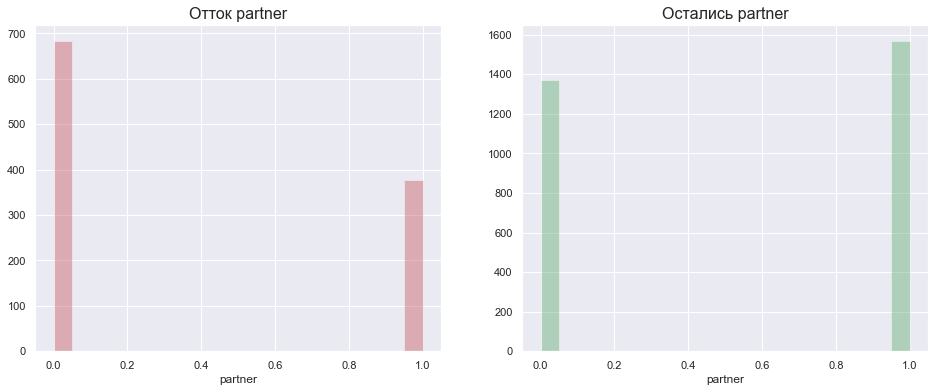

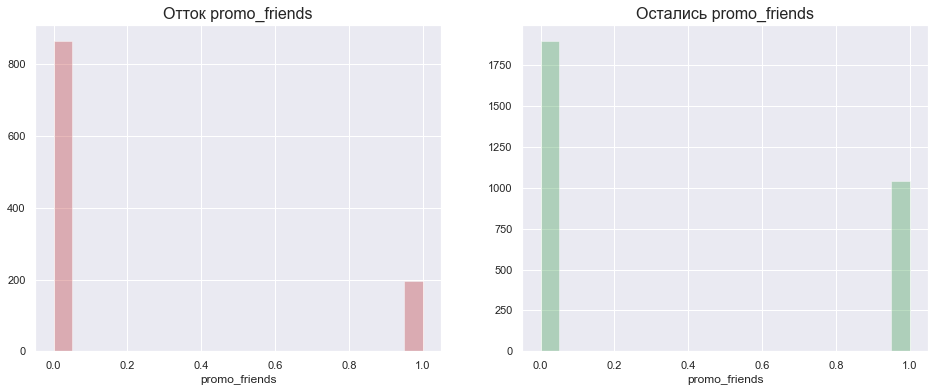

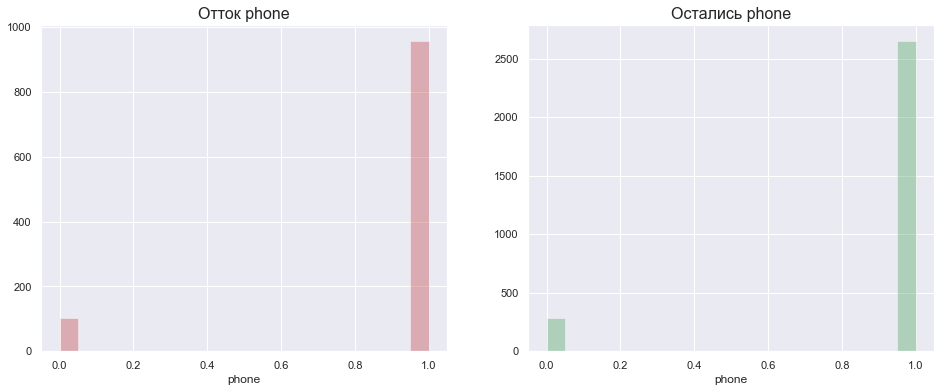

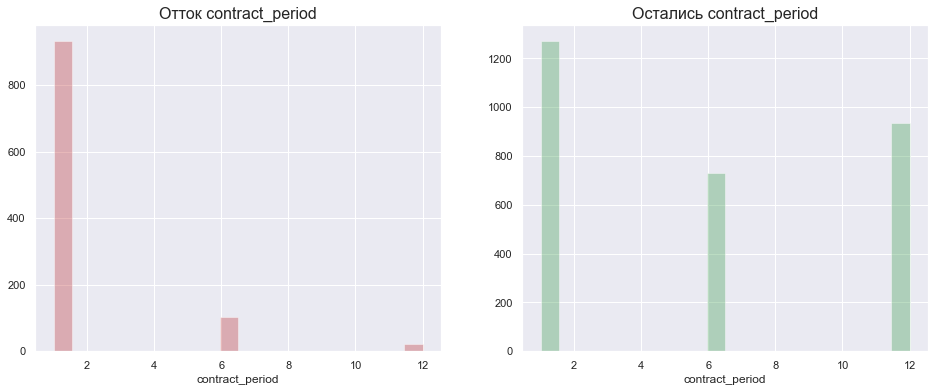

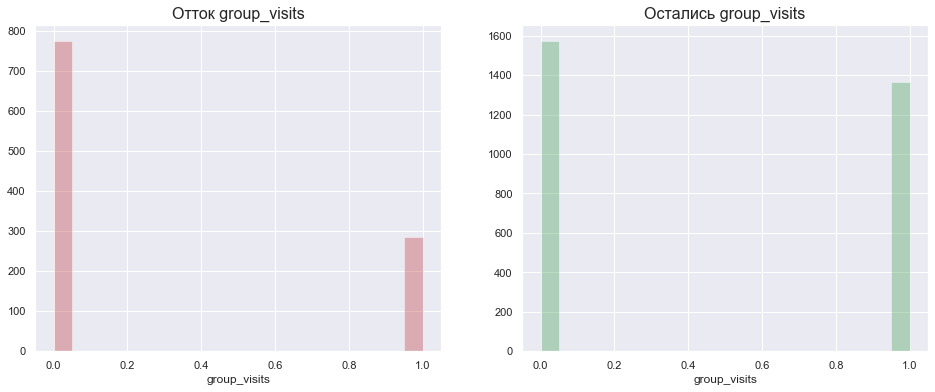

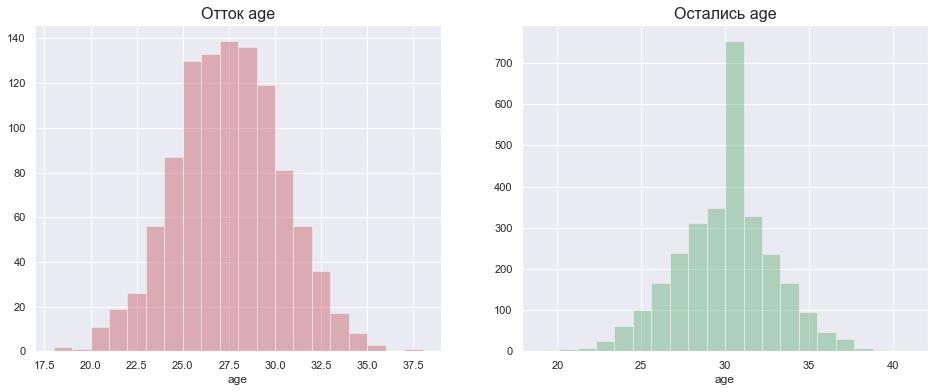

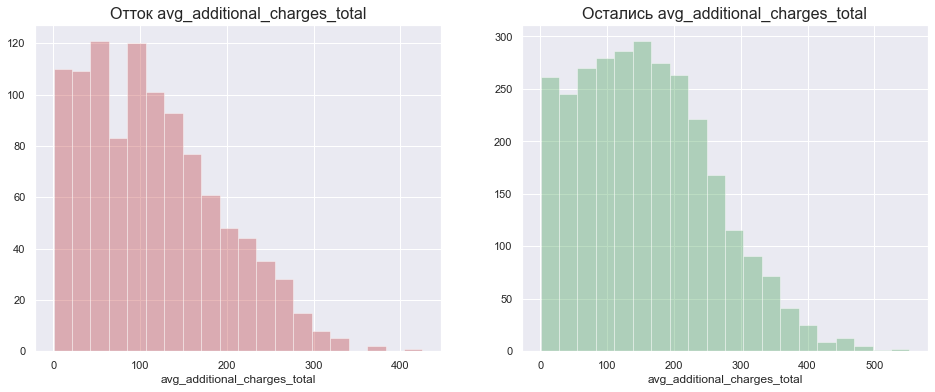

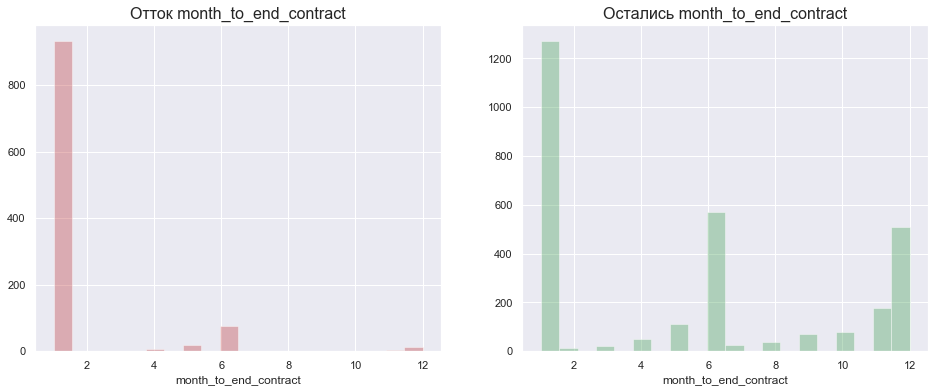

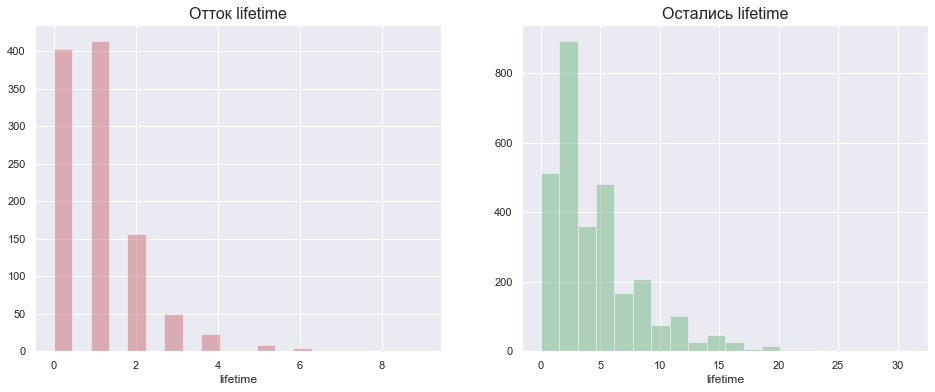

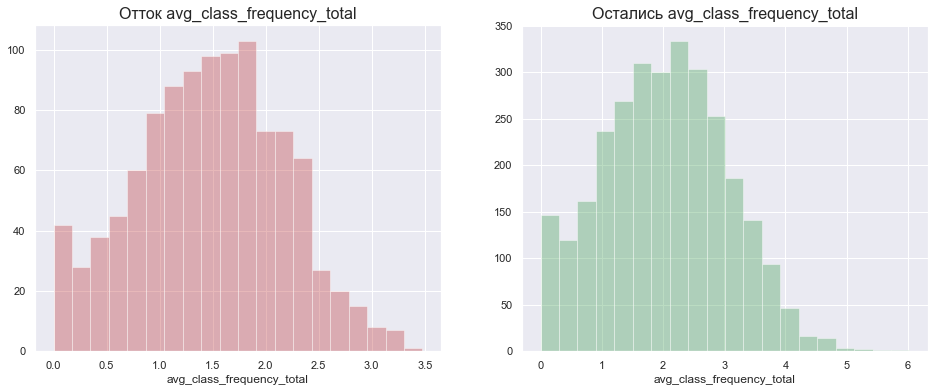

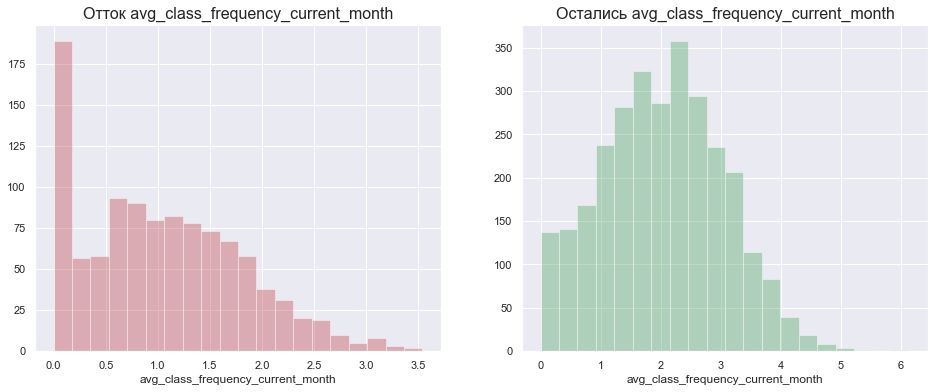

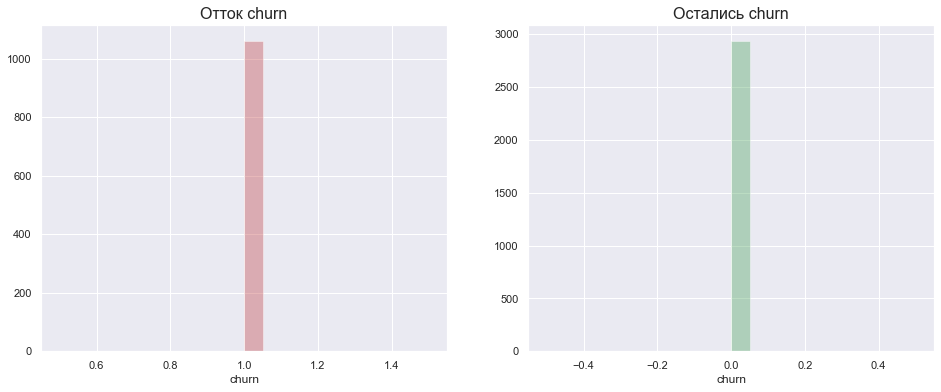

In [7]:
for column in data.columns:
    fig, axes = plt.subplots(1, 2, figsize = (16, 6))
    sns.distplot(data.query('churn == 1')[column], ax = axes[0], color="r", bins=20, kde=False)
    axes[0].set_title('Отток' + ' ' + column, fontsize=16)
    sns.distplot(data.query('churn == 0')[column], ax = axes[1], color="g", bins=20, kde=False)
    axes[1].set_title('Остались' + ' ' + column, fontsize=16)
    plt.show()

In [8]:
columns_list =  data[['gender', 'near_location', 'partner', 'promo_friends', 'phone',\
                 'contract_period', 'group_visits', 'age', 'month_to_end_contract', 'lifetime']]

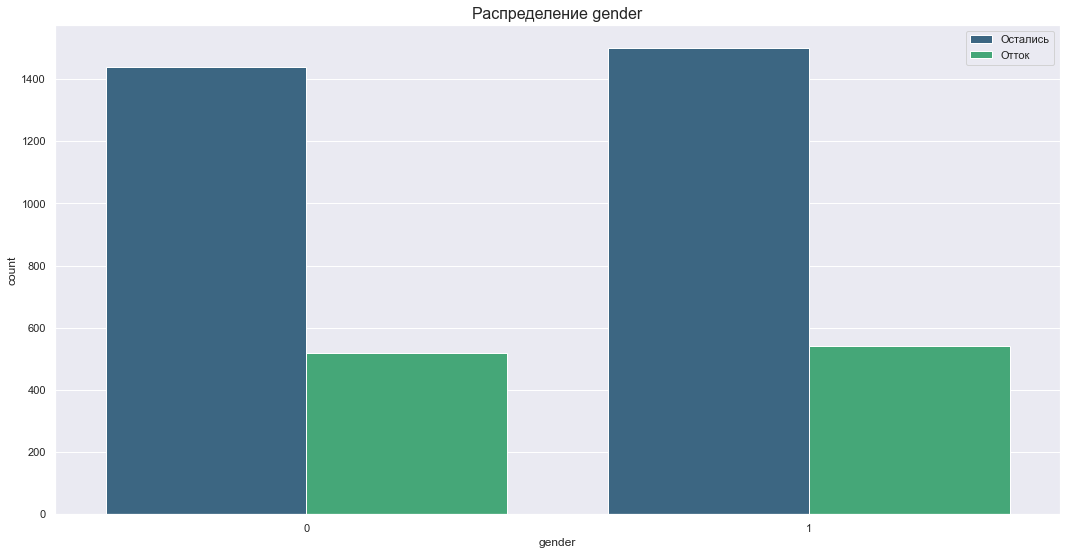

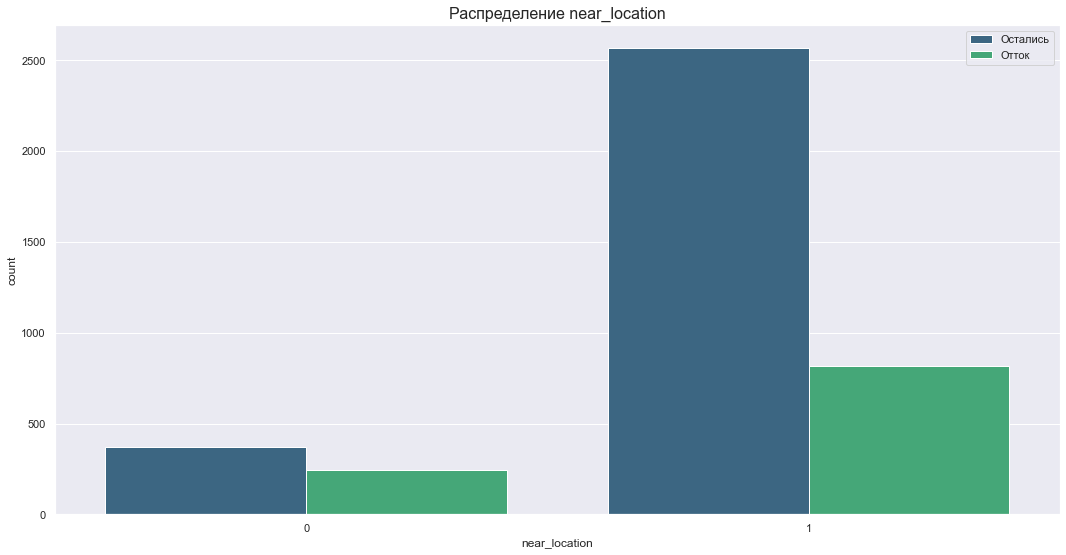

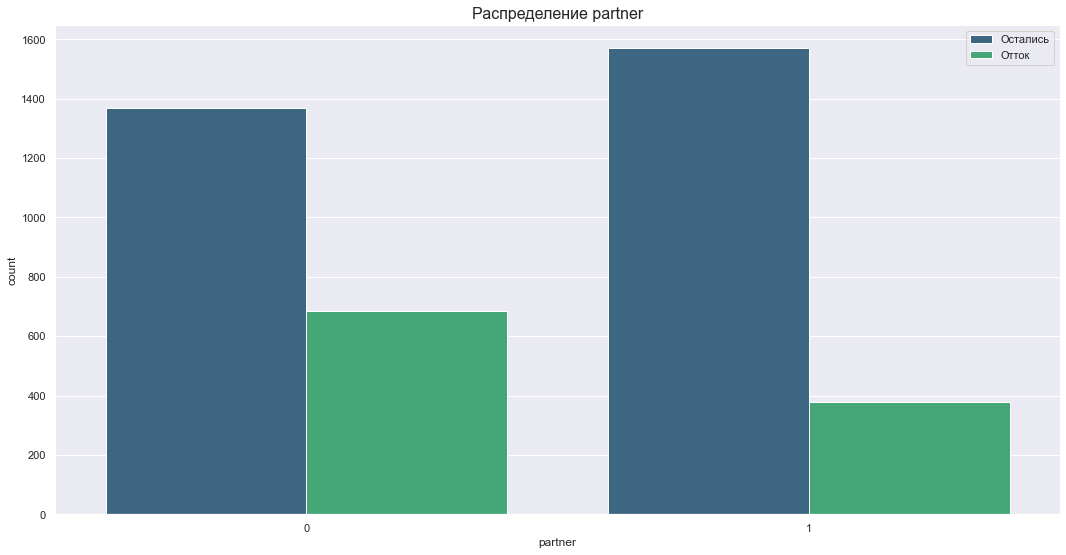

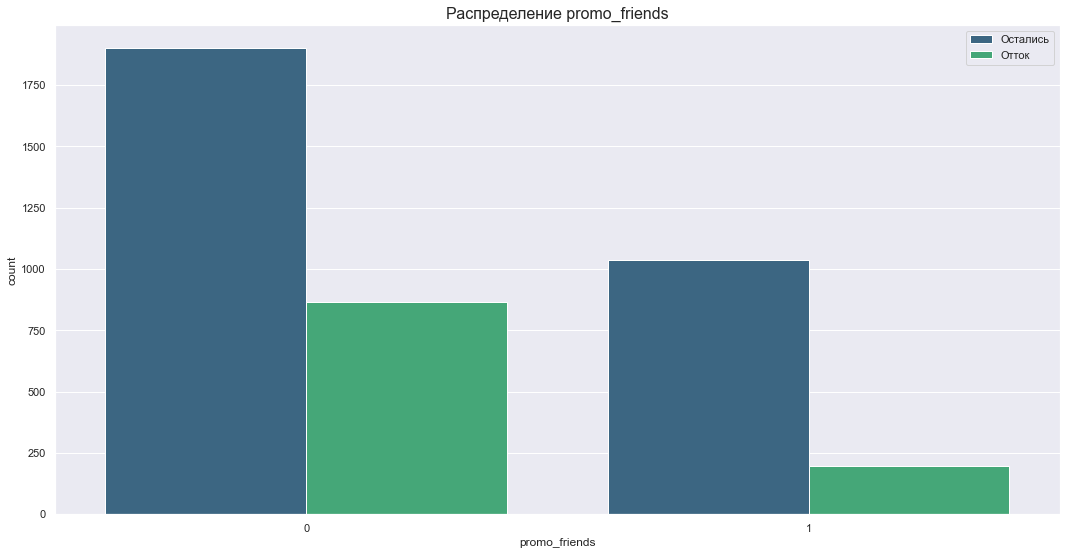

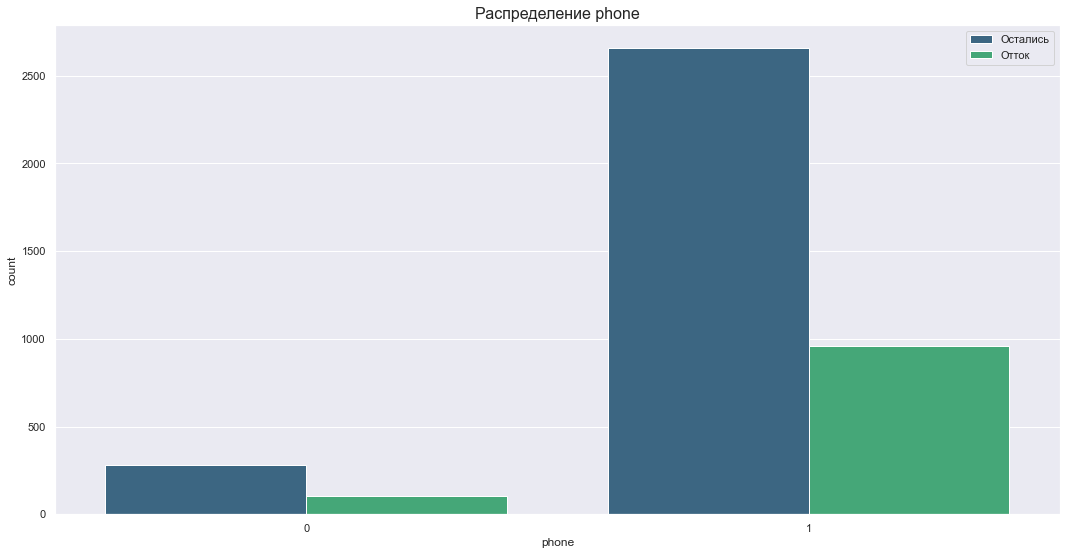

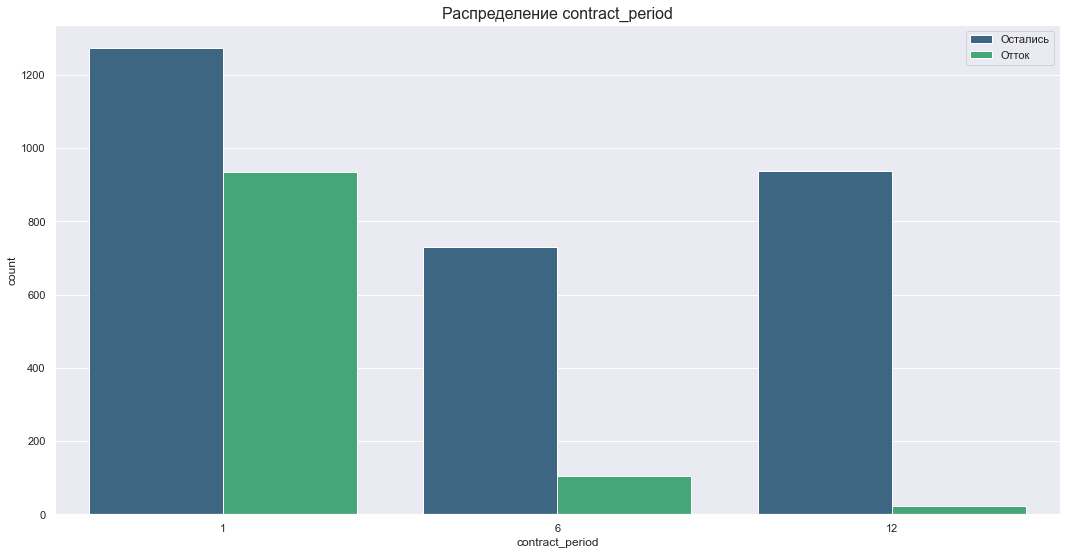

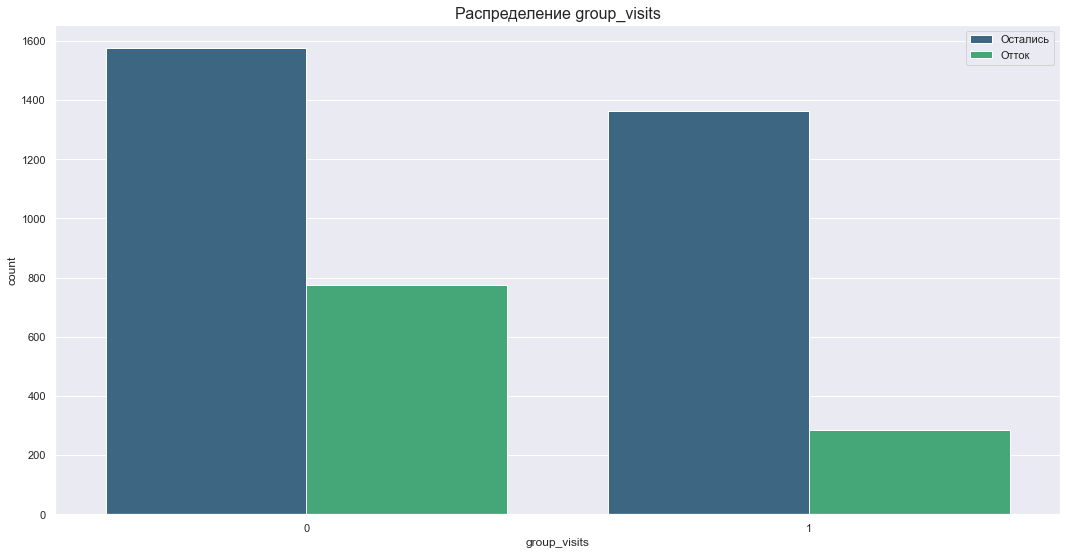

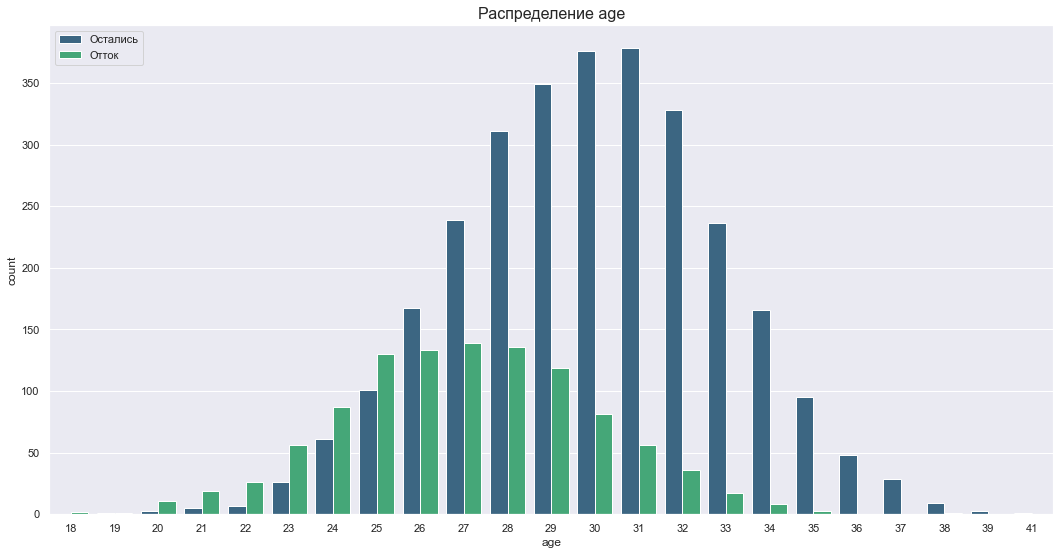

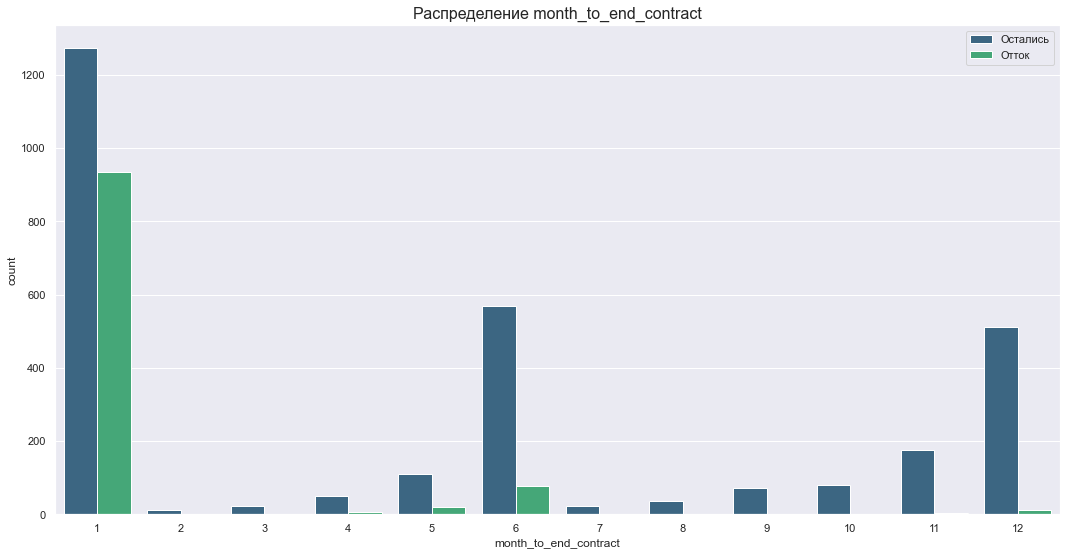

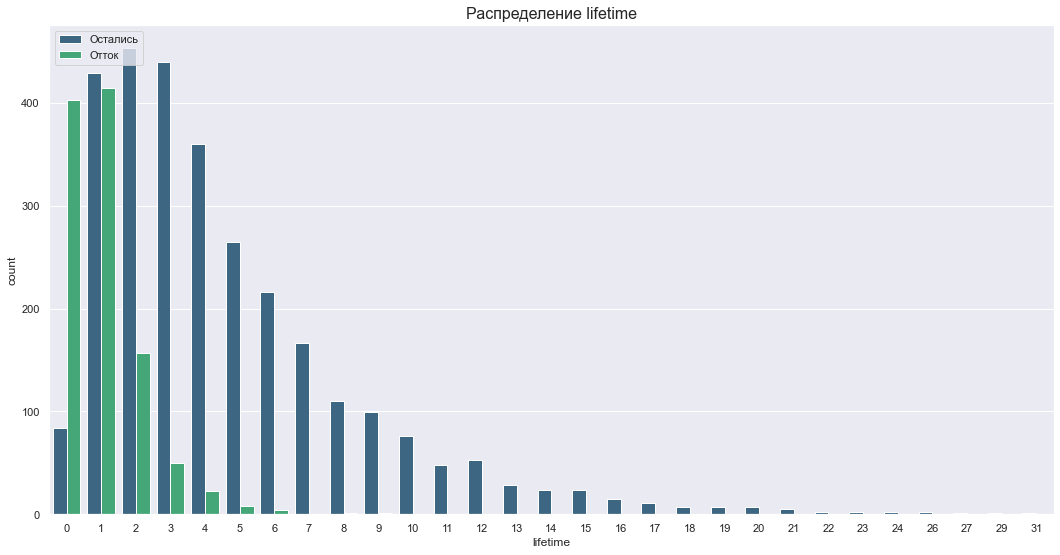

In [9]:

for column in columns_list:

    plt.figure(figsize=(18, 9))
    #sns.set_palette("Paired")
    sns.color_palette()
    sns.countplot(x=data[column], hue='churn', data=data, palette="viridis")
    plt.title('Распределение' + ' ' + column, fontsize=16)
    plt.legend(['Остались', 'Отток'])
    plt.show()



In [10]:
#data_gropby = data.groupby('churn').agg({'mean', 'std', 'var'}).apply(lambda x: 100*x/x.sum()).round(3).T
data_gropby = data.groupby('churn').agg({'mean', 'std', 'var'}).round(3).T
data_gropby.columns = ['Остались', 'Отток']
data_gropby

Остались     Отток
gender                            mean     0.510     0.511
                                  var      0.250     0.250
                                  std      0.500     0.500
near_location                     mean     0.873     0.768
                                  var      0.111     0.178
                                  std      0.333     0.422
partner                           mean     0.534     0.355
                                  var      0.249     0.229
                                  std      0.499     0.479
promo_friends                     mean     0.354     0.184
                                  var      0.229     0.150
                                  std      0.478     0.387
phone                             mean     0.904     0.903
                                  var      0.087     0.088
                                  std      0.295     0.296
contract_period                   mean     5.747     1.729
                                  var     22.250     4.547
                                  std      4.717     2.132
group_visits                      mean     0.464     0.269
                                  var      0.249     0.197
                                  std      0.499     0.443
age                               mean    29.977    26.990
                                  var      9.060     8.382
                                  std      3.010     2.895
avg_additional_charges_total      mean   158.446   115.083
                                  var   9960.359  6036.734
                                  std     99.802    77.696
month_to_end_contract             mean     5.283     1.663
                                  var     19.040     3.860
                                  std      4.364     1.965
lifetime                          mean     4.712     0.991
                                  var     15.014     1.234
                                  std      3.875     1.111
avg_class_frequency_total         mean     2.025     1.475
                                  var      1.032     0.483
                                  std      1.016     0.695
avg_class_frequency_current_month mean     2.028     1.045
                                  var      1.038     0.593
                                  std      1.019     0.770

Гендерно распределим отток:

In [11]:
churn_gender_rating = data.groupby('gender').agg({'churn': 'count'})

churn_gender_rating['churn_gender_rating'] = (data.groupby("gender").agg({'churn':"count"})
         .apply(lambda x: 100*x/x.sum()).sort_values('churn', ascending=False)).round(2)

churn_gender_rating.columns = ['количество', '% от общего кол-ва']
churn_gender_rating.reset_index()

,gender,количество,% от общего кол-ва
0,0,1959,48.98
1,1,2041,51.02


Посмотрим на общее соотношение оставшихся и ушедших:

In [12]:
data_gropby2 = data.groupby('churn').agg({'churn': 'count'}).apply(lambda x: 100*x/x.sum()).round(3).T
data_gropby2.columns = ['Остались', 'Отток']
data_gropby2

,Остались,Отток
churn,73.475,26.525


### Построим матрицу корреляций
<a name="2.2"></a>

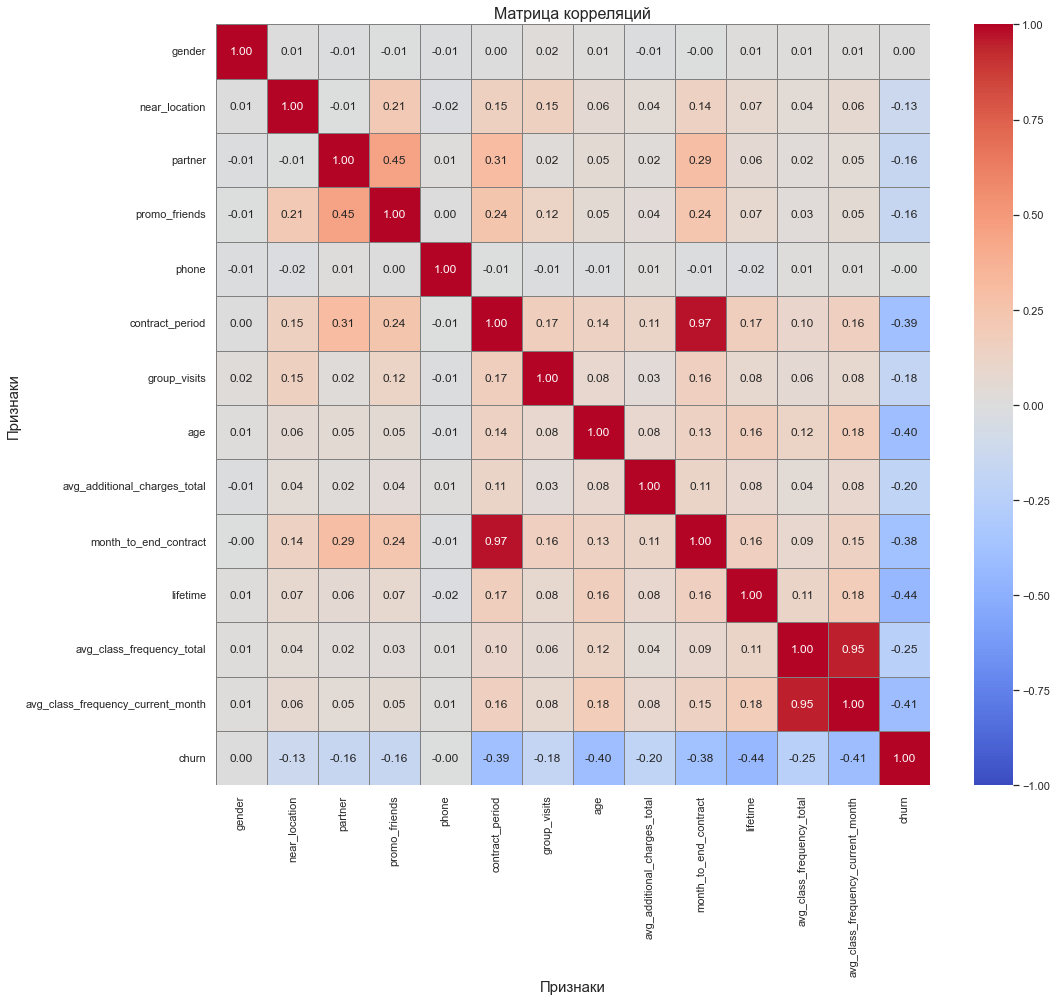

In [13]:
cm = data.corr()
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(cm, fmt='.2f', vmin=-1, annot = True, linewidths=1, linecolor='gray', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize = 16)
plt.ylabel('Признаки', fontsize=15)
plt.xlabel('Признаки', fontsize=15)
plt.show()

**Вывод:**
* почти равный ооток среди мужчин и женщие
* большинство пользуются месячным абонимкнтом
* удаленность от фитнес-центра слабо влияет на отток
* у большинства пользователей групповые занятия не пользуются популярностью
* большинство приобретает месячный абонемент
* у оставшихся пользователей средняя суммарная выручка от других услуг фитнес-центра равна 158, у ушедших 115
* у оставшихся пользователей средняя частота посещений в неделю за предыдущий месяц равна 2, у ушедших 1
* среди пользователей оплативших несколько месяцев остаются пользователи проплатвшие занятия в среднем на 5.2 месяцев, ушедшие на 1.6 месяца
* за представленный период отток составил 26.5%


Сильная кореляция среди признаков: 
* `contract_period` и `month_to_end_contract` (длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента);
* `avg_class_frequency_total` и `avg_class_frequency_current_month` (средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц)

Средняя корреляция среди признаков:
* `partner` и `promo_friends` (сотрудник компании-партнёра клуба и факт первоначальной записи в рамках акции «приведи друга»)
   
Слабая корреляция среди признаков:
* `partner` и `contract_period` 
* `promo_friends` и `contract_period` 
* `contract_period` и `group_visits` 
* `contract_period` и `near_location` 

Остаются те, кто:
* приобрел длительный абонемент
* часто посещает фитнес-центр
* пришел по партнерской программе  

## Модель прогнозирования оттока клиентов
<a name="3"></a>

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

Для создания рабочей модели необходимо убрать сильно скореллированные признаки из данных

In [14]:
data_clean = data.drop(['contract_period', 'avg_class_frequency_total'], axis=1)

Разделим данные на признаки (матрица X) и целевую переменную (y)

In [15]:
X = data_clean.drop('churn', axis=1)
y = data_clean['churn']

Разделяем модель на обучающую и валидационную выборку

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Определим функцию, которая будет выводить наши метрики

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Обучим модель на train-выборке двумя алгоритмами: `логистической регрессией`, `случайным лесом` с использованием метрик `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке

In [18]:

# Нормализуем данные. Обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()# Создаём объект класса scaler (нормализатор)
scaler.fit(X_train)

# Преобразуем обучающие и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print_all_metrics(
        y_test, 
        rf_predictions, 
        rf_probabilities, 
        title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.80


**Вывод:**
* Использованные модели дали похожие результаты
* Модель логистической регресии дала немного лучший результат, чем модель случайного леса.
* У модели случайного леса немного выше точность


## Кластеризация клиентов
<a name="4"></a>

Стандартизируем данные перед работой с алгоритмами

In [19]:
scaler = StandardScaler()

Уберем столбец с оттоком клиентов

In [20]:
data_sc = scaler.fit_transform(data.drop(columns = ['churn'])) 

Построим матрицу расстояний функцией `linkage()`на стандартизованной матрице признаков, нарисовам дендрограмму

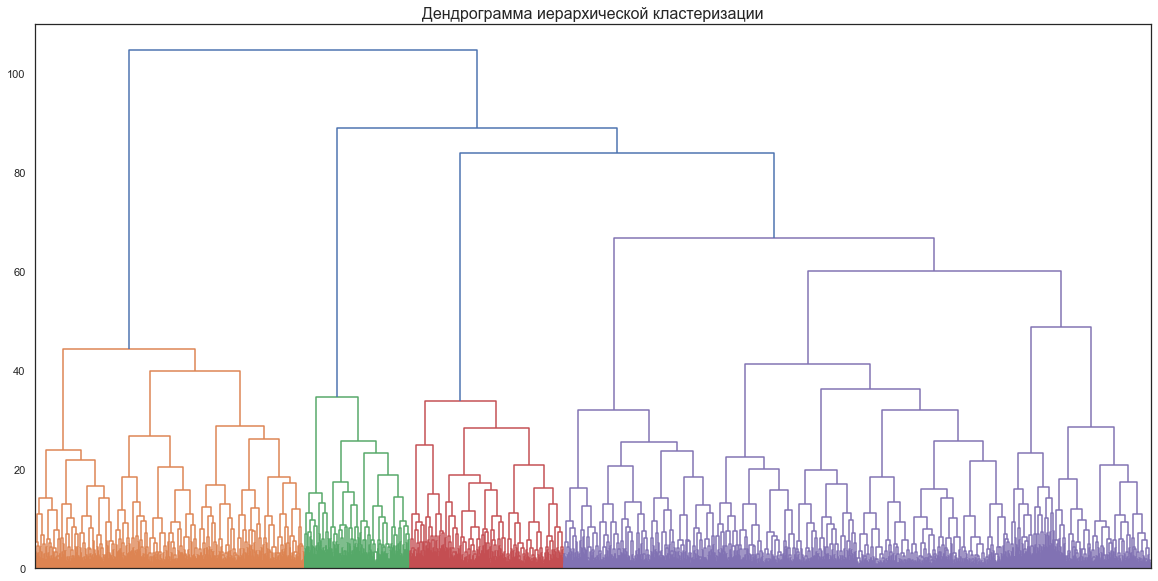

In [21]:
linked = linkage(data_sc, method='ward')
sns.set(style='white')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации', fontsize=16)
plt.show()

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
<a name="4.1"></a>

За число кластеров примем `n=5`

In [22]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5 
labels = km.fit_predict(data_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [23]:
# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

Характеризуем отделимость кластера от других
* Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация

In [24]:
silhouette_score(data_sc, labels)

0.14140953623023353

### Отобразим среднии значения признаков кластеров
<a name="4.2"></a>

Для каждого полученного кластера посчитаем долю оттока (методом `groupby()`)

In [25]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = data.groupby('cluster_km').mean().T
clusters

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


### Построим распределения признаков для кластеров
<a name="4.3"></a>

In [26]:
data.columns.values.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn',
 'cluster_km']

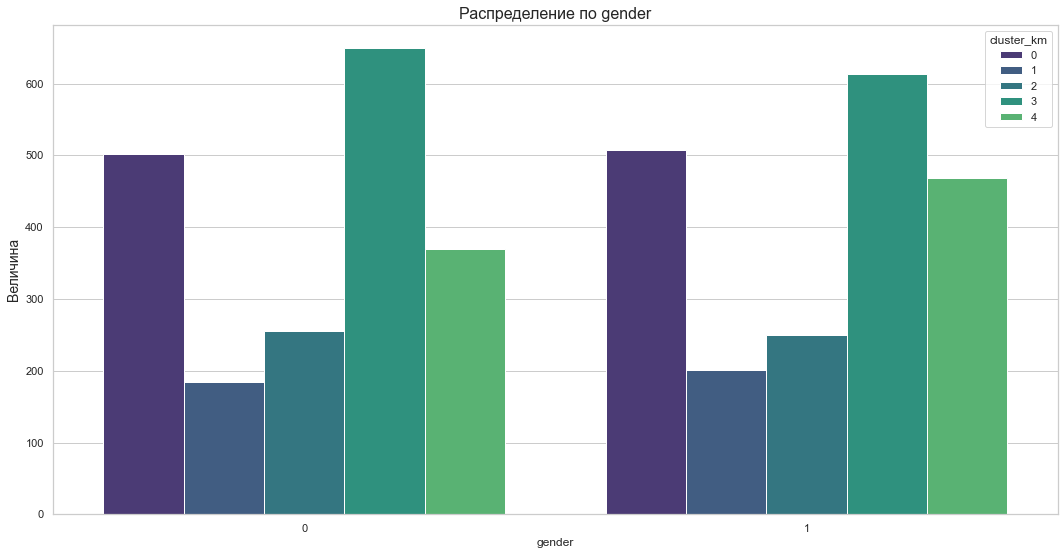

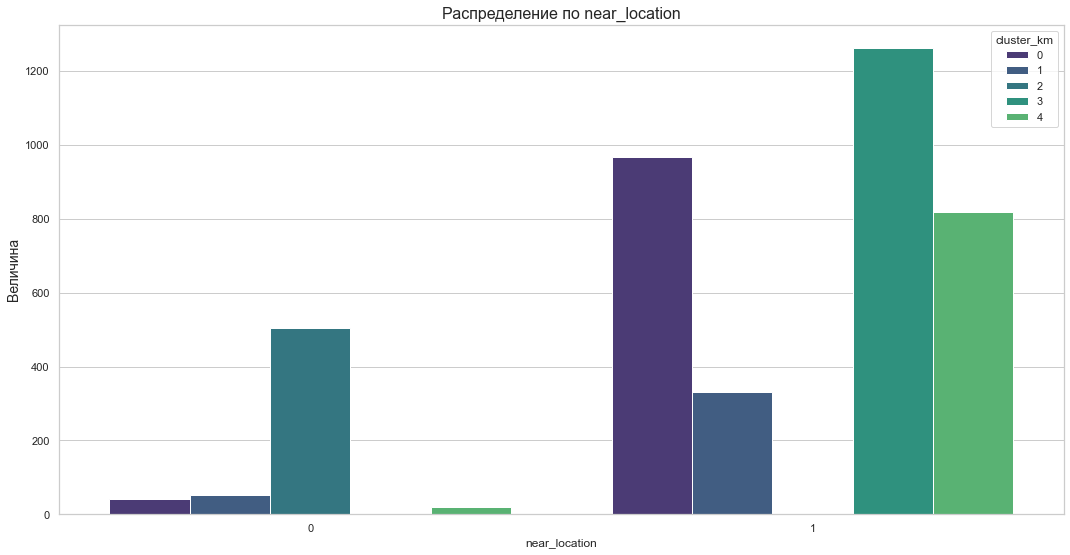

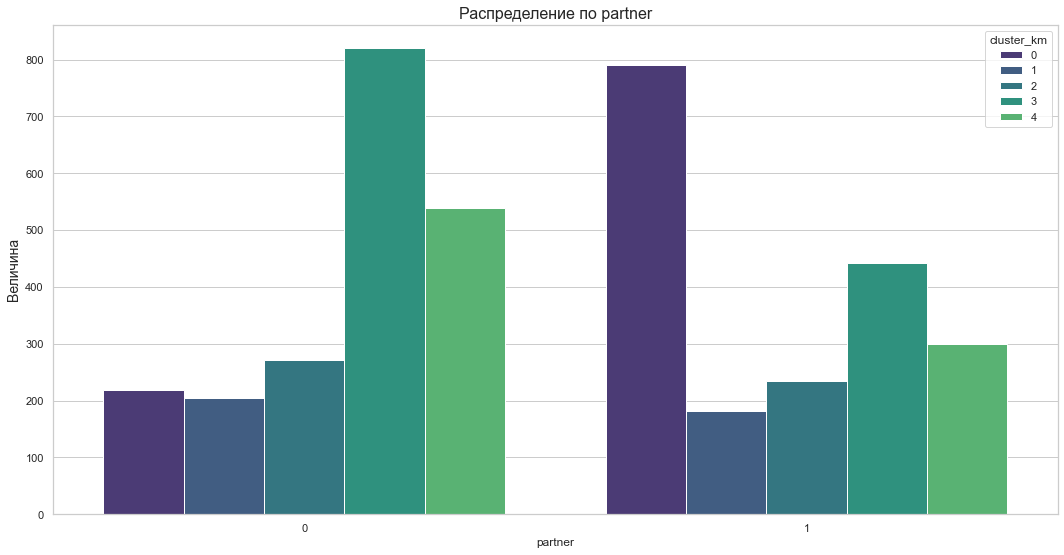

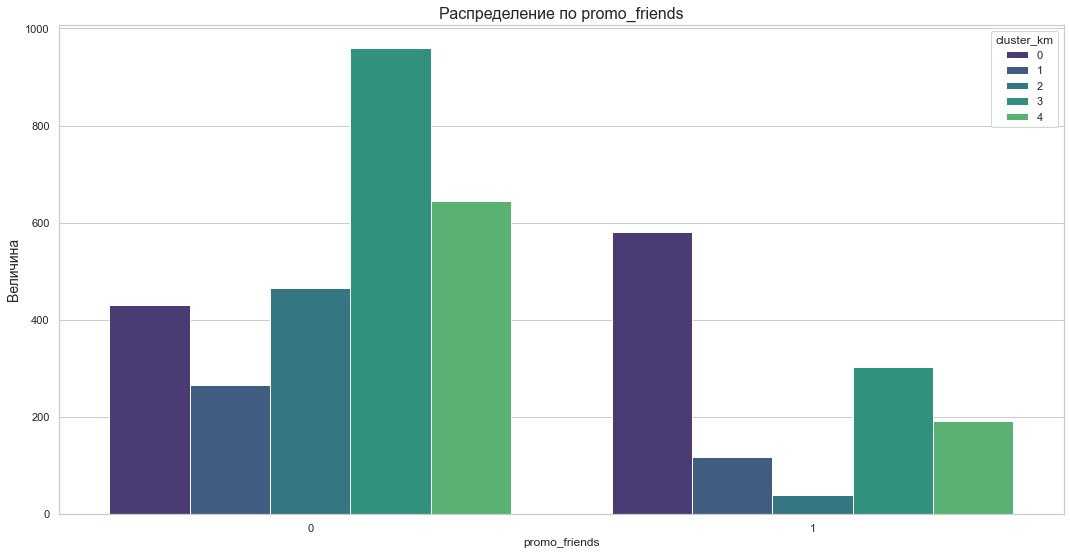

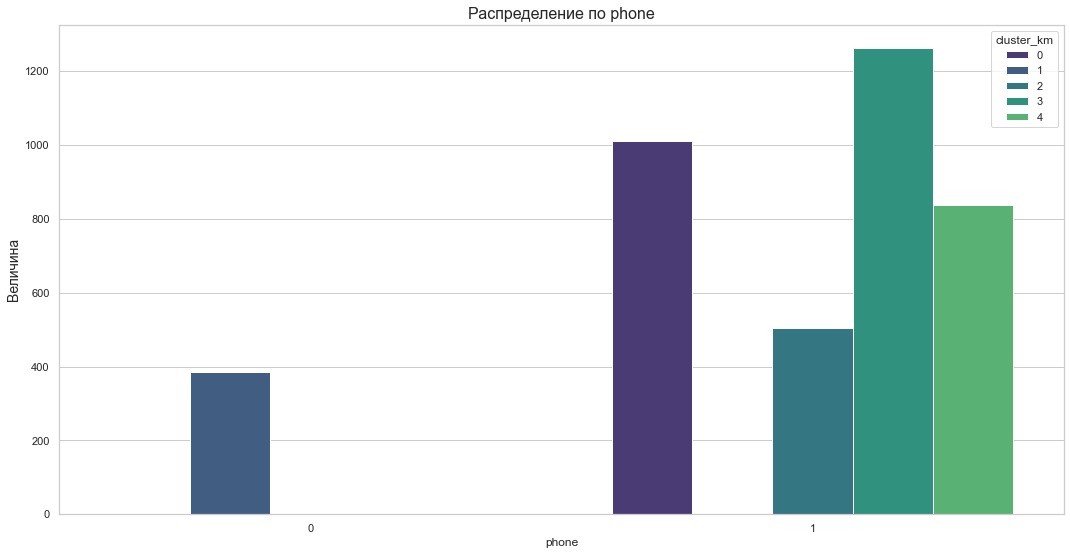

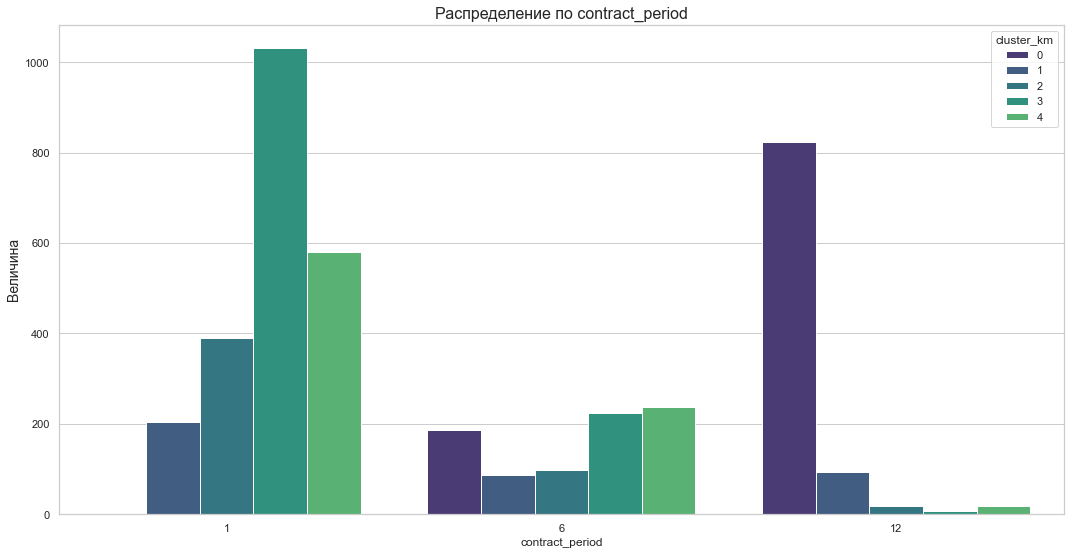

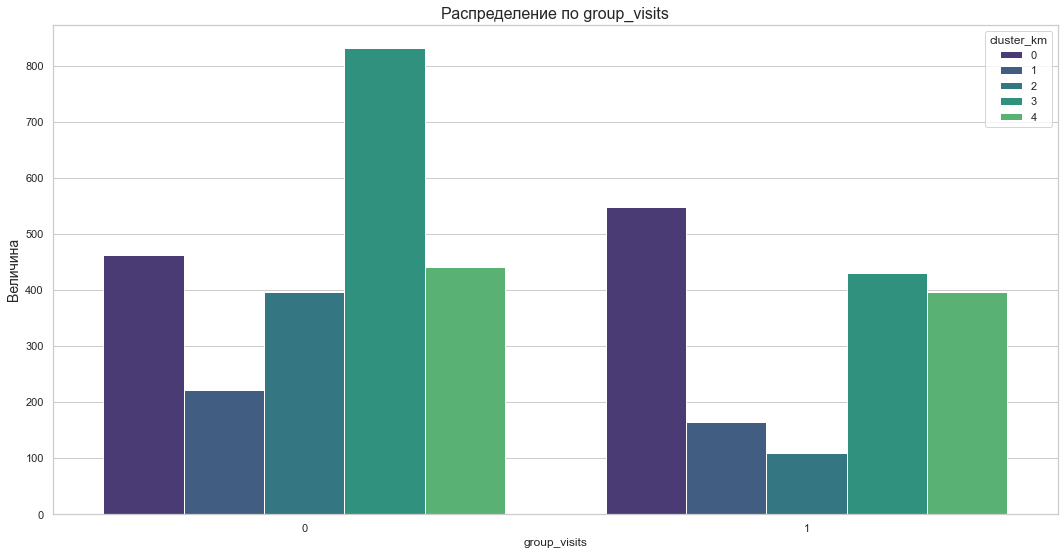

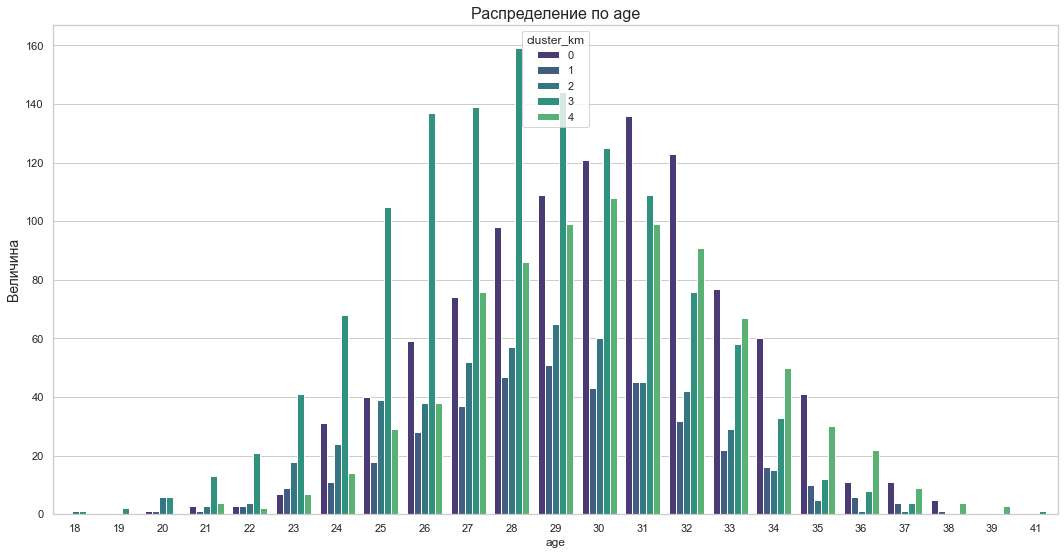

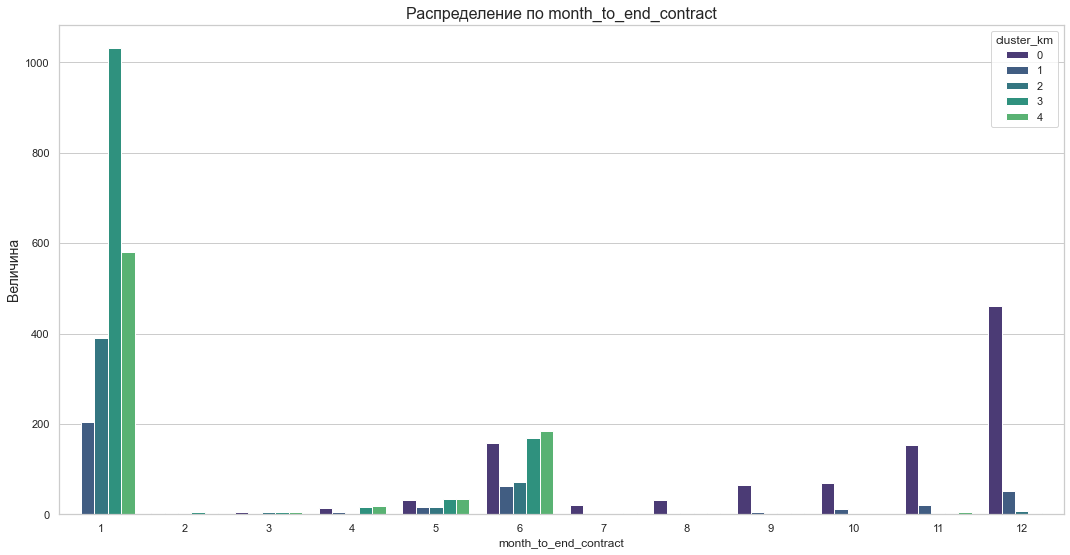

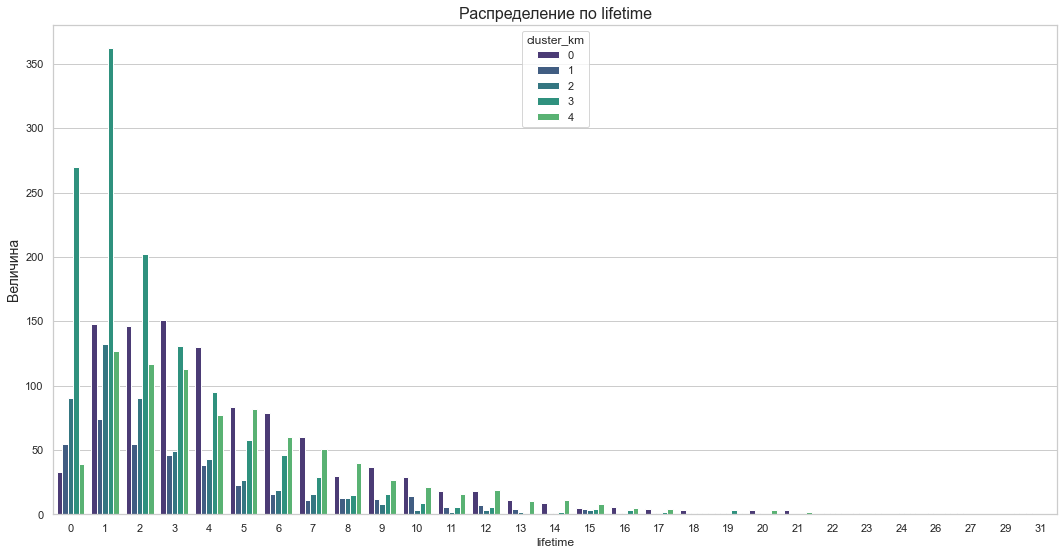

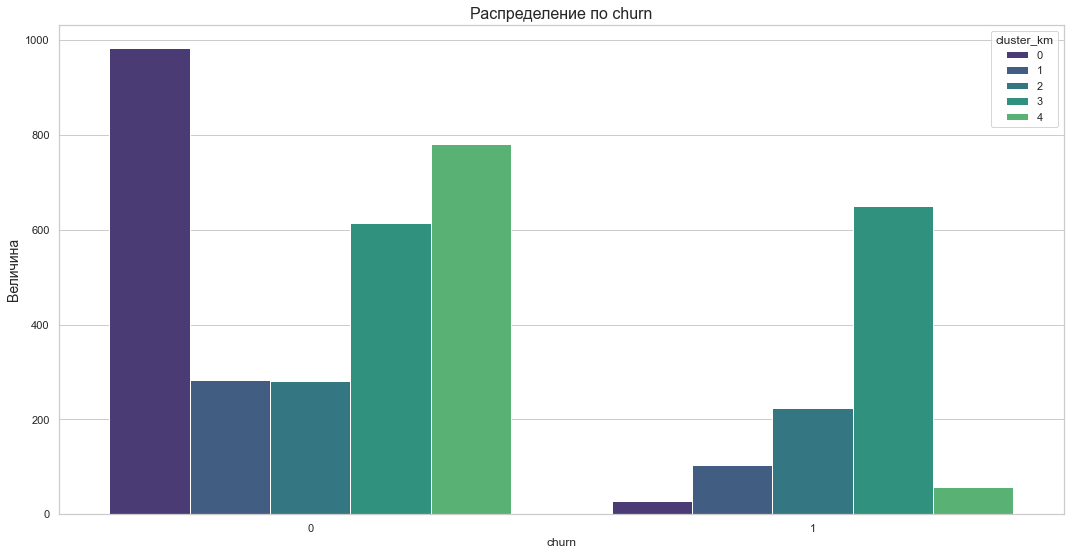

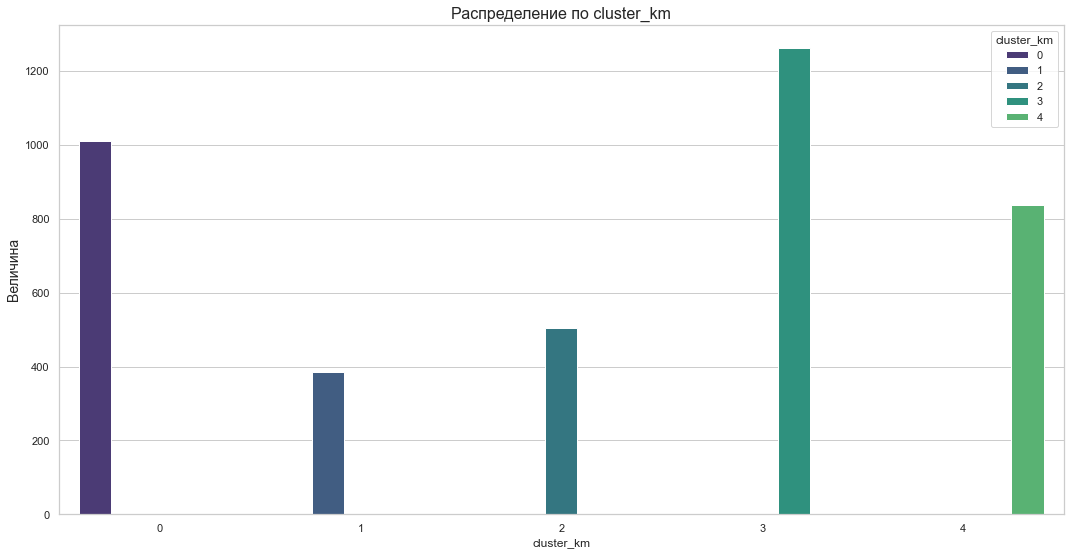

In [27]:
for column in ['gender',
             'near_location',
             'partner',
             'promo_friends',
             'phone',
             'contract_period',
             'group_visits',
             'age',
#             'avg_additional_charges_total',
             'month_to_end_contract',
             'lifetime',
#             'avg_class_frequency_total',
#             'avg_class_frequency_current_month'
             'churn',
             'cluster_km']:
    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 9))
    sns.set_palette("viridis")
    sns.countplot(x=data[column], hue = 'cluster_km', data=data)
    plt.title('Распределение по ' +column, fontsize=16)
    plt.ylabel('Величина', fontsize=14)
    plt.show()

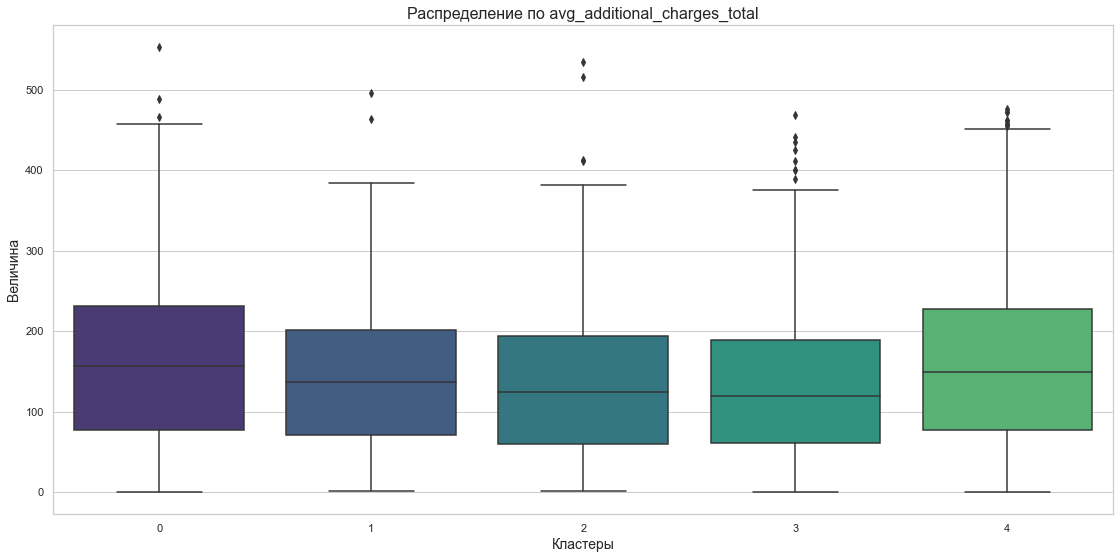

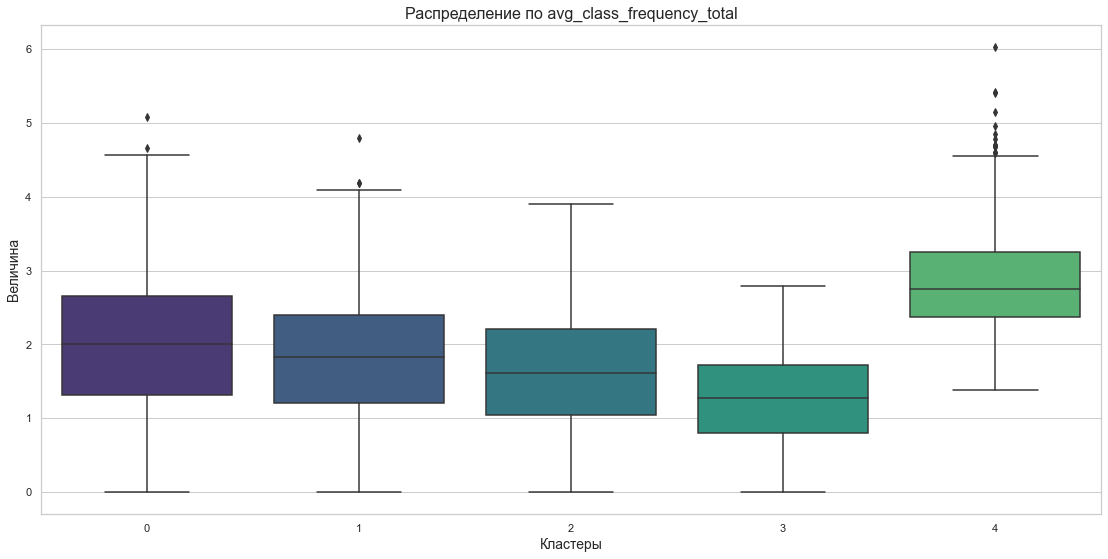

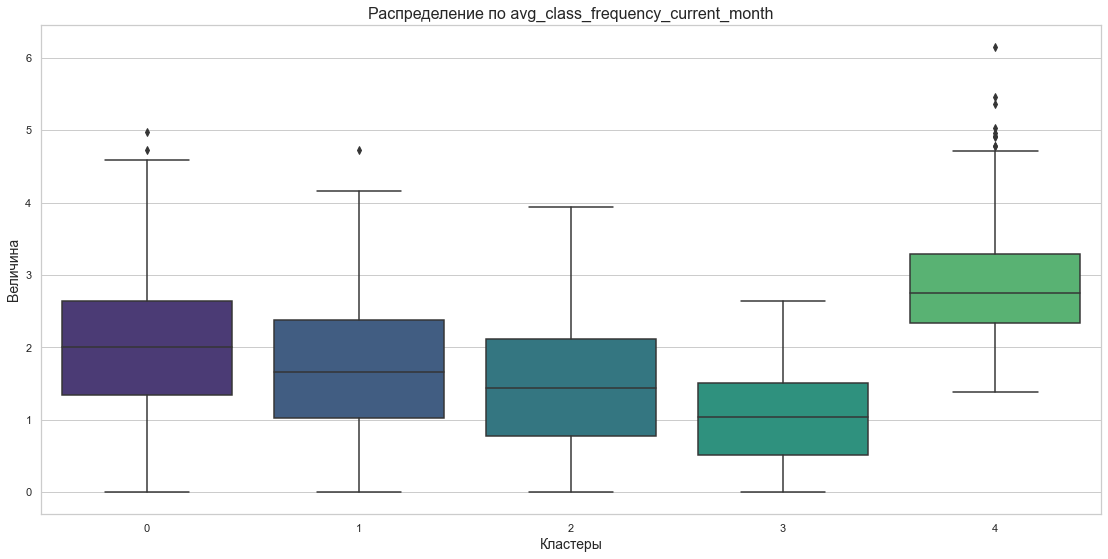

In [28]:
list_avg = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for column in list_avg:
    plt.figure(figsize = (19, 9))
    plt.grid(True)
    plt.title('Распределение по ' +column, fontsize=16)
    sns.boxplot(data = data, x = 'cluster_km', y = column)
    plt.xlabel('Кластеры', fontsize=14)
    plt.ylabel('Величина', fontsize=14)
    plt.show()

**Вывод:**

`Кластру №3` соответствует 51% ушедших клиентов, со следующими характеристиками:
* наименьшее время с момента первого обращения в фитнес-центр
* средний возраст 28 лет
* длительность текущего действующего абонемента самая низкая из всех кластеров
* самая низкая средняя частота посещений в неделю за все время с начала действия абонемента самая 
* наименьший срок до окончания текущего действующего абонемента (в месяцах) 
* наименьшая частота посещений в неделю за предыдущий месяц
* наименьшая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
    
`Кластеру №2` соответствует 44% ушедших клиентов:

* групповыми занятиями пользуются реже всех
* средний возраст 28.5 лет
* проживают или работают далеко от фитнес-центра
* вовлеченность в партнерские программы самая низкая


`Кластеру №1` соответствует 26% ушедших клиентов:
* отсутствует контактный номер
* ближе всех проживают или работают в районе, где находится фитнес-центр
* средний возраст 29.3 года


**Надежные кластеры:**

`Кластеру №0` соответствует: 
* самые высокие показатели партнерской программы
* самые высокие показатели рамках акции «приведи друга»
* чаще всего посещают групповые занятия
* покупают наиболее продолжительные абонементы
* средний возраст почти 30 лет


`Кластеру №4` соответствует: 
* наибольшая средняя частота посещений в неделю за все время с начала действия абонемента
* наибольшая средняя частота посещений в неделю за предыдущий месяц
* дольше всех пользуются услугами фитнес-центра
* средний возраст 30 лет
* этот кластер самый прибыльный



## Итоговый вывод
<a name="5"></a>

В ходе исследования разобрались в причинах оттока посетителей сети фитнес-центров «Культурист-датасаентист»
Исследование проводилось на основе данных заказчика, предоставленных в csv-файле:
* Предоставленные данные не содержат аномалий, пропусков и дубликатов
* Данные содержат: 4000 строк и 14 столбцов (признаков)

Обучили модели на train-выборке двумя алгоритмами: `логистической регрессией`, `случайным лесом` с использованием метрик `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке
Модель `логистической регрессии` дала лучший результат

По всем данным отток составил 26.5%
Остаются те, кто:
* приобрел длительный абонемент
* часто посещает фитнес-центр
* пришел по партнерской программе
* люди 30 лет

Партнерские программы и групповые занятия дают хороший результат по удержанию клиентов


## Базовые рекомендации
<a name="6"></a>

Для удержания клиентов необходимо: 
* Предлагать скидки при покупке абонемента от 6 месяцев
* Дополнить занятия с учетом желаний клиентов
* Рассмотреть вариант субсидирования частными компаниями или гос. структурами абонементов для своих сотрудников
